In this notebook, we will use the dataset saved from Notebook 3a to build a classifier that predicts the price range of a bicycle given its features. 

# Import Libraries

In [1]:
from pycaret.classification import *
import pandas as pd

# Set up Pycaret

In [2]:
df = pd.read_csv('../data/final_for_pycaret.csv')


setup(data=df, target='price', session_id=42)


best_model = compare_models() # get the train scores

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Multiclass
3,Original data shape,"(674, 39)"
4,Transformed data shape,"(674, 124)"
5,Transformed train set shape,"(471, 124)"
6,Transformed test set shape,"(203, 124)"
7,Ordinal features,3
8,Numeric features,11
9,Categorical features,27


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9682,0.9953,0.9682,0.9699,0.9681,0.9516,0.9526,0.1070
lr,Logistic Regression,0.9491,0.9946,0.9491,0.9505,0.9487,0.9226,0.9237,0.3610
gbc,Gradient Boosting Classifier,0.6840,0.9996,0.6840,0.8180,0.6475,0.5431,0.6262,0.1990
ridge,Ridge Classifier,0.5902,0.0000,0.5902,0.5875,0.5594,0.3635,0.3794,0.0850
nb,Naive Bayes,0.5455,0.8318,0.5455,0.7388,0.5282,0.3331,0.4137,0.1070
dt,Decision Tree Classifier,0.5372,0.6719,0.5372,0.4546,0.4478,0.3436,0.4819,0.1000
xgboost,Extreme Gradient Boosting,0.5223,0.8913,0.5223,0.7773,0.4482,0.3196,0.4607,0.1870
svm,SVM - Linear Kernel,0.4969,0.0000,0.4969,0.4190,0.3977,0.1865,0.2486,0.0850
rf,Random Forest Classifier,0.4332,0.9975,0.4332,0.8062,0.3753,0.1848,0.3174,0.1570
dummy,Dummy Classifier,0.4119,0.5000,0.4119,0.1697,0.2404,0.0000,0.0000,0.1130


In [3]:
# get the test score of the best model
predict_model(best_model) 

,no_of_likes,no_of_images,title,listing_price,item_condition,deal_method,post_date,category_type,post_type,condition_subtext,...,x4,x5,x6,x7,x8,x9,x10,price,prediction_label,prediction_score
253,2,5,Invisible shield protection film for Factor Os...,69 80,Brand new,Meetup,2 weeks ago,Road Bikes,Posted,Never used. May come with original packaging o...,...,shimano,frame,mm,road,new,cm,speed,0,0,1.0
219,3,7,"2021 Giant tcr adv pro 1, S size","2,298",Like new,Meetup,4 days ago,Road Bikes,Posted,Used once or twice. As good as new.,...,advanced,pro,size,carbon,disc,wheelset,advance,2,2,1.0
605,8,4,Cannondale caad 8,688,Like new,Meetup,2 days ago,Road Bikes,Posted,Used once or twice. As good as new.,...,shimano,frame,mm,road,new,cm,speed,1,1,1.0
619,4,6,"Shimano 105 disc group set, 11speed (Mechanical)",700,Like new,Meetup,Yesterday,Road Bikes,Posted,Used once or twice. As good as new.,...,shimano,frame,mm,road,new,cm,speed,1,1,1.0
383,11,6,Argon 18 Krypton Carbon Road Bike Lightweight,"1,499",Well used,Meetup,2 months ago,Road Bikes,Posted,Has minor flaws or defects.,...,shimano,frame,mm,road,new,cm,speed,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,9,6,Giant Talon (2018) Road Bike,299,Well used,Meetup,1 week ago,Road Bikes,Posted,Has minor flaws or defects.,...,advanced,pro,size,carbon,disc,wheelset,advance,0,0,1.0
594,33,7,Road race bike - Cannondale Caad12 - Size 58,"1,500",Lightly used,Meetup,20 hours ago,Road Bikes,Bumped,"Used with care. Flaws, if any, are barely noti...",...,shimano,frame,mm,road,new,cm,speed,2,2,1.0
281,18,10,SOLD Trek FX stagger grey ladies women small s...,399,Lightly used,Meetup,2 weeks ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",...,shimano,frame,mm,road,new,cm,speed,0,0,1.0
623,2,8,Giant City Escape 2,550,Lightly used,Meetup,20 hours ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",...,shimano,frame,mm,road,new,cm,speed,0,0,1.0


In [4]:
# Get test score of lr

model_lr = create_model('lr')
predictions = predict_model(model_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9957,0.9167,0.9245,0.9183,0.8740,0.8763
1,0.9149,0.9960,0.9149,0.9170,0.9131,0.8700,0.8724
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9362,0.9939,0.9362,0.9360,0.9354,0.9032,0.9038
4,0.9787,0.9994,0.9787,0.9801,0.9787,0.9677,0.9684
5,0.9787,0.9916,0.9787,0.9801,0.9787,0.9677,0.9684
6,0.9362,0.9958,0.9362,0.9367,0.9358,0.9028,0.9035
7,0.9149,0.9896,0.9149,0.9149,0.9128,0.8704,0.8723
8,0.9362,0.9857,0.9362,0.9356,0.9353,0.9028,0.9035


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9064,0.9874,0.9064,0.9062,0.9062,0.8574,0.8575


In [5]:
# Get test score of ada

model_gbc = create_model('gbc')
predictions = predict_model(model_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5417,1.0000,0.5417,0.8218,0.4597,0.3506,0.4925
1,0.8085,1.0000,0.8085,0.8834,0.8144,0.7109,0.7421
2,0.8511,0.9955,0.8511,0.9007,0.8556,0.7743,0.7946
3,0.5106,1.0000,0.5106,0.4106,0.4118,0.3030,0.4528
4,0.5532,1.0000,0.5532,0.8213,0.4954,0.3595,0.4894
5,0.5106,1.0000,0.5106,0.8148,0.4371,0.3008,0.4426
6,0.8298,1.0000,0.8298,0.8917,0.8344,0.7444,0.7703
7,0.5532,1.0000,0.5532,0.8213,0.4728,0.3616,0.4990
8,0.9362,1.0000,0.9362,0.9474,0.9373,0.9035,0.9078


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5369,0.9987,0.5369,0.8214,0.4771,0.3418,0.4765


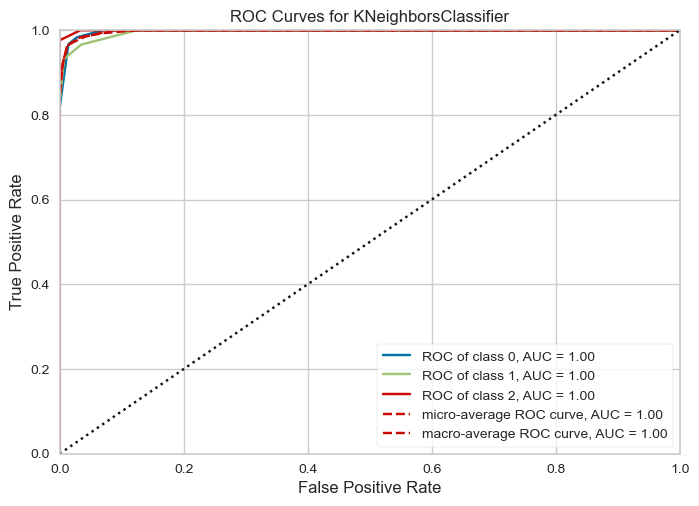

In [6]:
plot_model(best_model, plot='auc')

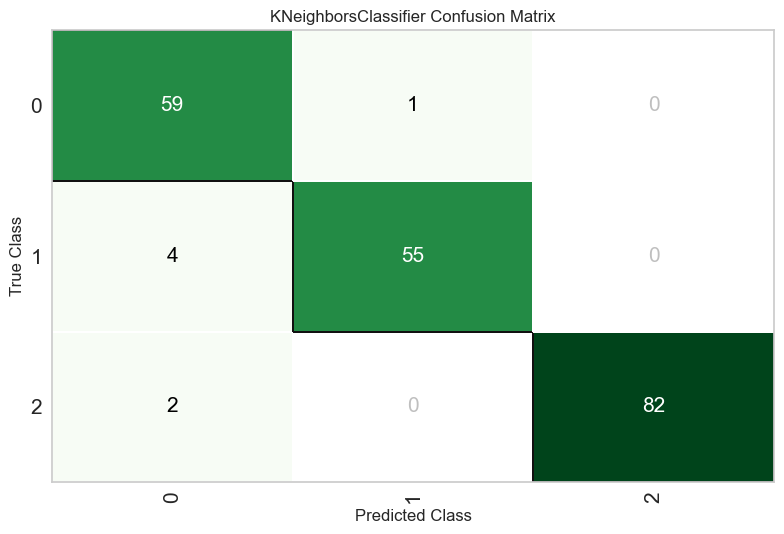

In [7]:
plot_model(best_model, plot='confusion_matrix')

In [8]:
# Get the parameters of the best model
params = best_model.get_params()

# Print the parameters
print(params)


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [9]:
print(get_config('pipeline'))

Pipeline(memory=FastMemory(location=/var/folders/jv/vqyftcs92v5_1kzvbv8kdcx40000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['no_of_likes', 'no_of_images',
                                             'verified_by_email',
                                             'verified_by_facebook',
                                             'verified_by_mobile',
                                             'seller_stars_rating',
                                             'reviews_of_seller',
                                             'current_listing_price',
                                             'len_posts', 'post_word_count'...
                                             'post_date', 'meetup_location',
                                             'seller_id', 'brands',
                                             'lemma_posts'],
                                    transformer=Tar

In [10]:
save_model(best_model, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/jv/vqyftcs92v5_1kzvbv8kdcx40000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['no_of_likes', 'no_of_images',
                                              'verified_by_email',
                                              'verified_by_facebook',
                                              'verified_by_mobile',
                                              'seller_stars_rating',
                                              'reviews_of_seller',
                                              'current_listing_price',
                                              'len_posts', 'post_word_count'...
                                                                     'seller_id',
                                                                     'brands',
                                                                     'lemma_posts'],


In [11]:
# Set the maximum number of columns displayed to 100
pd.set_option('display.max_columns', 100)

In [12]:
get_config('X_train')

,no_of_likes,no_of_images,title,listing_price,item_condition,deal_method,post_date,category_type,post_type,condition_subtext,mailing_option,meetup_option,meetup_location,seller_id,seller_join_date,seller_response,seller_verif,verified_by_email,verified_by_facebook,verified_by_mobile,seller_stars_rating,reviews_of_seller,brands,current_listing_price,len_posts,post_word_count,lemma_posts,probability,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
635,0,10,Vitus Sean Kelly Limited Edition (56cm),"1,099",Well used,Meetup,5 days ago,Road Bikes,Posted,Has minor flaws or defects.,N,Y,Bukit Panjang,silentwood,Joined 9 years ago,Very Responsive,Verified,NaN,NaN,NaN,5.0,57,Vitus,1099.0,423,61,vitus sean kelly limited edition 56 cm compone...,0.252424,specialized,bike,mm,carbon,shimano,tarmac,size,saddle,speed,ultegra
116,48,2,Gaint 2021 TCR Advance 2 Size XS Cbrake,"2,000 2,200",Lightly used,Meetup,3 weeks ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",N,Y,Blk 178 Edgefield Plains,weiyigougou,Joined 8 years ago,Very Responsive,Verified,1.0,1.0,1.0,4.9,7,Giant,2000.0,302,53,gaint 2021 tcr advance 2 size xs cbrake r7000 ...,1.000000,giant,tcr,shimano,advanced,pro,size,carbon,disc,wheelset,advance
87,6,1,Specialized SL4,"1,200",Well used,Meetup,3 weeks ago,Road Bikes,Posted,Has minor flaws or defects.,N,Y,Blk 330 Bukit Batok,jovieman,Joined 8 years ago,Very Responsive,Verified,1.0,1.0,1.0,4.6,10,Specialized,1200.0,16,2,specialized sl4,1.000000,specialized,bike,mm,carbon,shimano,tarmac,size,saddle,speed,ultegra
134,38,5,Giant Road Bike XS,450,Lightly used,Meetup,1 week ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",N,Y,East Coast Park,fezplease,Joined 7 years ago,Very Responsive,Verified,1.0,0.0,1.0,4.8,17,Giant,450.0,209,37,giant road bike xs son grow road bike aluminiu...,0.149368,bike,size,carbon,shimano,frame,mm,road,new,cm,speed
630,41,4,Pinarello Full Carbon Bike,988,Lightly used,Meetup,3 days ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",N,Y,Singapore / Singapura / 新加坡 / சிங்கப்பூர் (Sin...,work.examples,Joined 4 years ago,Very Responsive,Verified,NaN,NaN,NaN,5.0,331,"Pinarello, Pinarello, Dogma",988.0,564,99,pinarello carbon bike pinarello dogma 60.1 whi...,1.000000,pinarello,dogma,size,di2,dura,ace,f12,bike,ultegra,wheelset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,16,1,Scott Speedster S20,800,Well used,Meetup,3 weeks ago,Road Bikes,Posted,Has minor flaws or defects.,N,Y,Castle Green Clubhouse,61300,Joined 5 years ago,Very Responsive,Verified,1.0,0.0,1.0,5.0,8,"giant, Scott, trek, specialized",800.0,569,99,scott speedster s20 size 52 fast race bike pac...,0.116528,bike,size,carbon,shimano,frame,mm,road,new,cm,speed
220,8,3,Canyon endurance (OEM) size: small,"1,280",Brand new,Meetup,3 weeks ago,Road Bikes,Posted,Never used. May come with original packaging o...,N,Y,SPC CommonwealthHolland Village MRT Station (C...,fifty18,Joined 6 years ago,Very Responsive,Verified,1.0,0.0,1.0,4.8,43,"Canyon, Canyon",1280.0,153,24,canyon endurance oem size small canyon oem fra...,1.000000,canyon,cf,bike,ultimate,endurace,aeroad,size,sl,shimano,new
537,27,5,Boardman Elite Air 9.8 Carbon Aero Bike,"2,199",Well used,Meetup,6 days ago,Road Bikes,Bumped,Has minor flaws or defects.,N,Y,Oasis @ EliasPasir Ris MRT Station (EW1),wils777,Joined 1 year ago,Very Responsive,Verified,NaN,NaN,NaN,5.0,12,"Boardman, Boardman",2199.0,907,148,boardman elite air 9.8 carbon aero bike read d...,0.222609,bike,size,carbon,shimano,frame,mm,road,new,cm,speed
462,10,5,Java Ronda road bike shimano sora,850,Brand new,Mailing · Meetup,1 month ago,Road Bikes,Posted,Never used. May come with original packaging o...,Y,Y,Kapo Factory Building03-03 ( Block A),gcycle,Joined 5 years ago,Very Responsive,Verified,1.0,0.0,1.0,4.9,65,"Giant, Merida",850.0,460,69,java ronda road bike shimano sora late model j..

In [13]:
get_config('X_train_transformed')

,no_of_likes,no_of_images,title,listing_price,item_condition_Well used,item_condition_Lightly used,item_condition_Like new,item_condition_Brand new,item_condition_Heavily used,deal_method_Meetup,deal_method_Mailing · Meetup,deal_method_Mailing,post_date,category_type_Road Bikes,post_type,condition_subtext_Has minor flaws or defects.,"condition_subtext_Used with care. Flaws, if any, are barely noticeable.",condition_subtext_Used once or twice. As good as new.,condition_subtext_Never used. May come with original packaging or tag.,condition_subtext_Has obvious signs of use or defects.,mailing_option,meetup_option,meetup_location,seller_id,seller_join_date_Joined 9 years ago,seller_join_date_Joined 8 years ago,seller_join_date_Joined 7 years ago,seller_join_date_Joined 4 years ago,seller_join_date_Joined 1 year ago,seller_join_date_Joined 6 years ago,seller_join_date_Joined 2 years ago,seller_join_date_Joined 2 months ago,seller_join_date_Joined 5 years ago,seller_join_date_Joined 1 month ago,seller_join_date_Joined 3 years ago,seller_join_date_Joined 10 years ago,seller_join_date_Joined 11 months ago,seller_join_date_Joined 7 months ago,seller_join_date_Joined 9 months ago,seller_join_date_Joined 4 months ago,seller_join_date_Joined 4 days ago,seller_response_Very Responsive,seller_response_Mostly Responsive,seller_response_Not Responsive,seller_verif_Verified,verified_by_email,verified_by_facebook,verified_by_mobile,seller_stars_rating,reviews_of_seller,...,x3_size,x3_reacto,x3_bike,x3_bontrager,x4_carbon,x4_advanced,x4_shimano,x4_di2,x4_bike,x4_ultimate,x4_oclv,x5_shimano,x5_pro,x5_frame,x5_dura,x5_ultegra,x5_endurace,x5_bike,x6_tarmac,x6_size,x6_mm,x6_ace,x6_shimano,x6_aeroad,x6_slr,x7_size,x7_carbon,x7_road,x7_f12,x8_saddle,x8_disc,x8_new,x8_bike,x8_scultura,x8_sl,x8_aeolus,x9_speed,x9_wheelset,x9_cm,x9_ultegra,x9_frame,x9_shimano,x9_emonda,x10_ultegra,x10_advance,x10_speed,x10_wheelset,x10_road,x10_new,x10_carbon
635,0.0,10.0,1.103427,1.102030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.110787,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.103427,1.103427,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.972752,0.504087,0.99455,5.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
116,48.0,2.0,1.233535,1.233535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.055903,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.233535,1.233535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.000000,1.00000,4.9,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,6.0,1.0,1.103427,1.071182,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.055903,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.103427,1.103427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,1.000000,1.00000,4.6,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
134,38.0,5.0,0.973318,0.772010,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.046953,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.973318,0.973318,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.000000,1.00000,4.8,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
630,41.0,4.0,1.103427,1.100531,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.050597,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.060721,1.103427,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.972752,0.504087,0.99455,5.0,331.0,...,1.0,0.0,

In [14]:
y_train = get_config('y_train')

In [15]:
# Calculate the percentage of each category
category_percentages = get_config('y_train').value_counts(normalize=True)

# Print the percentages - this gives baseline accuracy
print(category_percentages)


2    0.411890
1    0.295117
0    0.292994
Name: price, dtype: float64


In [17]:
# Predict on the hold-out set
predictions = predict_model(best_model)

predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9655,0.9981,0.9655,0.9675,0.9658,0.9476,0.9483


,no_of_likes,no_of_images,title,listing_price,item_condition,deal_method,post_date,category_type,post_type,condition_subtext,mailing_option,meetup_option,meetup_location,seller_id,seller_join_date,seller_response,seller_verif,verified_by_email,verified_by_facebook,verified_by_mobile,seller_stars_rating,reviews_of_seller,brands,current_listing_price,len_posts,post_word_count,lemma_posts,probability,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,price,prediction_label,prediction_score
253,2,5,Invisible shield protection film for Factor Os...,69 80,Brand new,Meetup,2 weeks ago,Road Bikes,Posted,Never used. May come with original packaging o...,N,Y,Jade Scape,edmond2211,Joined 4 years ago,Very Responsive,Verified,1.0,0.0,1.0,5.0,35,Factor,69.0,1034,148,invisible shield protection film factor ostro ...,0.090965,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,0,0,1.0
219,3,7,"2021 Giant tcr adv pro 1, S size","2,298",Like new,Meetup,4 days ago,Road Bikes,Posted,Used once or twice. As good as new.,N,Y,607 Amk Ave 4,JazzBikeShop,Joined 5 years ago,Very Responsive,Verified,1.0,1.0,1.0,5.0,70,"Giant, Giant",2298.0,332,58,2021 giant tcr adv pro 1 s size 2021 giant tcr...,1.000000,giant,tcr,shimano,advanced,pro,size,carbon,disc,wheelset,advance,2,2,1.0
605,8,4,Cannondale caad 8,688,Like new,Meetup,2 days ago,Road Bikes,Posted,Used once or twice. As good as new.,N,Y,Punggol Park,kantoi_81,Joined 5 years ago,Very Responsive,Verified,NaN,NaN,NaN,4.5,33,"Cannondale, cannondale",688.0,134,24,cannondale caad 8 cannondale caad 8 alu frame ...,0.081576,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,1,1,1.0
619,4,6,"Shimano 105 disc group set, 11speed (Mechanical)",700,Like new,Meetup,Yesterday,Road Bikes,Posted,Used once or twice. As good as new.,N,Y,Toa Payoh NorthMeet up under my block 206 Toa ...,Thehaymaker,Joined 8 years ago,Mostly Responsive,Verified,NaN,NaN,NaN,4.7,36,Giant,700.0,343,54,shimano 105 disc group set 11speed mechanica...,0.179973,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,1,1,1.0
383,11,6,Argon 18 Krypton Carbon Road Bike Lightweight,"1,499",Well used,Meetup,2 months ago,Road Bikes,Posted,Has minor flaws or defects.,N,Y,Seasons Park Tower 2,avidfuze,Joined 10 years ago,Mostly Responsive,Verified,1.0,1.0,1.0,5.0,9,", ,",1499.0,787,120,argon 18 krypton carbon road bike lightweight ...,0.178130,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,9,6,Giant Talon (2018) Road Bike,299,Well used,Meetup,1 week ago,Road Bikes,Posted,Has minor flaws or defects.,N,Y,Bus Stop 59421 (Blk 624),luckyplantita,Joined 9 years ago,Mostly Responsive,Verified,1.0,1.0,1.0,5.0,46,"Giant, Giant",299.0,151,28,giant talon 2018 road bike giant 2018 road bik...,0.398630,giant,tcr,shimano,advanced,pro,size,carbon,disc,wheelset,advance,0,0,1.0
594,33,7,Road race bike - Cannondale Caad12 - Size 58,"1,500",Lightly used,Meetup,20 hours ago,Road Bikes,Bumped,"Used with care. Flaws, if any, are barely noti...",N,Y,Spottiswoode Residences,coenottevanger,Joined 2 years ago,Very Responsive,Verified,NaN,NaN,NaN,5.0,1,"Cannondale, Cannondale",1500.0,594,109,road race bike cannondale caad12 size 58 sell ...,0.090033,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,2,2,1.0
281,18,10,SOLD Trek FX stagger grey ladies women small s...,399,Lightly used,Meetup,2 weeks ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",N,Y,Pasir Panjang Road,bbt_bbt,Joined 8 years ago,Mostly Responsive,Verified,0.0,0.0,1.0,5.0,324,"Trek, trek",399.0,350,61,sell trek fx stagger grey lady woman small siz...,0.235051,bike,size,carbon,shimano,frame,mm,road,new,cm,speed,0,0,1.0
623,2,8,Giant City Escape 2,550,Lightly used,Meetup,20 hours ago,Road Bikes,Posted,"Used with care. Flaws, if any, are barely noti...",N,Y,619A Punggol Drive,sdsanjay7,Joined 3 years ago,Very Responsive,Verified,NaN,N

In [18]:
def prediction_label_to_num(text):
  if text == 'High':
    return 0
  elif text == 'Med':
    return 2
  else:
    return 1

In [19]:
predictions['prediction_label_to_num'] = predictions['prediction_label'].apply(prediction_label_to_num)

In [20]:
# Find the misclassified rows
misclassified=predictions[predictions['price'] != predictions['prediction_label_to_num']]

In [21]:
for i in misclassified['lemma_posts']:
  print(i)

invisible shield protection film factor ostro vam size 52 protect ostro vam ultimate invisible self heal frame protection kit film use scientifically formulate create strong reliable layer protection damage stone chip abrasion cable rub scratch   kit come need installation squeegee application bottle application solution film manufacture suntek widely automotive industry 5 year manufacturer warranty yellow crack blistering protect main area frame need installation squeegee application solution bottle include   main feature benefit •          nearly invisible protection abrasion scratch stone chip cable rub   •          advanced self heal film create strong durable layer protection •          custom pattern develop model allow film fit perfectly
2021 giant tcr adv pro 1 s size 2021 giant tcr adv pro 1 condition scratch fall s size shimano ultegra r8000 groupset new powerway r13 carbon wheelset 38 mm loud hub ceramic braket(rp 118 3 t ergonova team carbon handlebar(rp 260 shimano pro lt 